In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('E:\\2024')

In [3]:
hr = pd.read_csv("HR_DataSet.csv")

In [4]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
hr.shape

(14999, 10)

In [7]:
hr = hr.drop_duplicates()

In [8]:
hr.shape

(11991, 10)

In [9]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [10]:
x = hr.drop('left', axis=1)
y = hr.left

In [11]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
numeric_vars = x.select_dtypes(include = ['int64','float64']).columns.to_list()
categorical_vars = x.select_dtypes(include = ['object','category']).columns.to_list()

In [14]:
numeric_vars

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

In [15]:
categorical_vars

['Department', 'salary']

In [16]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [17]:
hr.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [21]:
hr.Department.nunique()

10

In [18]:
hr.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [19]:
x = pd.get_dummies(x, drop_first=True)

In [20]:
x.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 100)

In [23]:
x.shape, X_train.shape, X_test.shape

((11991, 18), (8393, 18), (3598, 18))

In [24]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model1 = sm.Logit(y_train, X_train).fit()

C:\Users\veda\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.358788
         Iterations 7


In [25]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                 8393
Model:                          Logit   Df Residuals:                     8374
Method:                           MLE   Df Model:                           18
Date:                Wed, 10 Jul 2024   Pseudo R-squ.:                  0.2027
Time:                        16:22:48   Log-Likelihood:                -3011.3
converged:                       True   LL-Null:                       -3777.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.9919      0.287     -6.933      0.000      -2.555      -1.429
satisfaction_level        -4.0678      0.145    -28.096      0.000      -4.352      -3.784
last_evaluation            0.7577      0.215      3.518      0.000       0.336       1.180
number_project            -0.2955      0.031     -9.450      0.000      -0.357      -0.234
average_montly_hours       0.0039      0.001      5.241      0.000       0.002       0.005
time_spend_company         0.3046      0.024     12.644      0.000       0.257       0.352
Work_accident             -1.3113      0.126    -10.393      0.000      -1.559      -1.064
promotion_last_5years     -1.1460      0.391     -2.932      0.003      -1.912      -0.380
Department_RandD          -0.2602      0.190     -1.368      0.171      -0.633       0.113
Department_accounting      0.0005      0.185      0.003      0.998      -0.361       0.362
Department_hr              0.1101      0.184      0.598      0.550      -0.251       0.471
Department_management     -0.1706      0.226     -0.756      0.450      -0.613       0.272
Department_marketing       0.1951      0.181      1.078      0.281      -0.160       0.550
Department_product_mng    -0.1178      0.184     -0.639      0.523      -0.479       0.243
Department_sales           0.0842      0.132      0.637      0.524      -0.175       0.343
Department_support         0.1340      0.143      0.935      0.350      -0.147       0.415
Department_technical       0.1097      0.139      0.791      0.429      -0.162       0.382
salary_low                 1.6991      0.187      9.070      0.000       1.332       2.066
salary_medium              1.3414      0.188      7.117      0.000       0.972       1.711
==========================================================================================
"""

In [26]:
from sklearn.metrics import confusion_matrix as cm

In [28]:
test_pred = model1.predict(sm.add_constant(X_test))

C:\Users\veda\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [29]:
test_pred

11873    0.072465
5512     0.107006
11086    0.120301
57       0.662330
5807     0.185662
           ...   
793      0.129395
309      0.585483
50       0.338985
6000     0.033375
11072    0.062097
Length: 3598, dtype: float64

In [30]:
test_df = pd.DataFrame()
test_df['y_actual'] = y_test
test_df['y_prob'] = test_pred
test_df['y_pred'] = np.where(test_df['y_prob'] < 0.5,0,1)

In [31]:
test_df

,y_actual,y_prob,y_pred
11873,0,0.072465,0
5512,0,0.107006,0
11086,0,0.120301,0
57,1,0.662330,1
5807,0,0.185662,0
...,...,...,...
793,1,0.129395,0
309,1,0.585483,1
50,1,0.338985,0
6000,0,0.033375,0


In [32]:
conf_matrix = cm(test_df['y_actual'],test_df['y_pred'],labels=(1,0))
conf_matrix

array([[ 133,  462],
       [ 132, 2871]], dtype=int64)

In [ ]:
            Predicted
            1         0
        1 133       462
Actual
        0 132       2871


In [34]:
TP = 133
FN = 462
FP = 132
TN = 2871

Recall = TP/(TP+FN)*100
Precision = TP/(TP+FP)*100
Accuracy = (TP+TN)/(TP+FN+FP+TN)*100

print('Recall: ',Recall)
print('Precision: ',Precision)
print('Accuracy: ',Accuracy)

Recall:  22.35294117647059
Precision:  50.18867924528302
Accuracy:  83.49082823790995


In [36]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [37]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [39]:
X = hr.drop('left', axis=1)
y = hr.left

preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numeric_vars),
                                              ('cat', OneHotEncoder(), categorical_vars)])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 100)

In [43]:
pipeline = Pipeline(steps= [('preprocessor', preprocessor)])
log_reg_pipeline = Pipeline(steps= [('preprocessor', preprocessor), ('classifier',LogisticRegression())])
log_reg_pipeline.fit(X_train, y_train)
y_pred_log_reg = log_reg_pipeline.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Accuracy: 0.8351862145636465
[[2872  131]
 [ 462  133]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      3003
           1       0.50      0.22      0.31       595

    accuracy                           0.84      3598
   macro avg       0.68      0.59      0.61      3598
weighted avg       0.80      0.84      0.81      3598



In [48]:
y_pred_log_reg = log_reg_pipeline.predict_proba(X_test)#[:,1]

In [49]:
y_pred_log_reg

array([[0.92744186, 0.07255814],
       [0.89299269, 0.10700731],
       [0.8797573 , 0.1202427 ],
       ...,
       [0.66117416, 0.33882584],
       [0.96649768, 0.03350232],
       [0.93788044, 0.06211956]])

In [50]:
y_pred_log_reg = log_reg_pipeline.predict_proba(X_test)[:,1]
y_pred_log_reg

array([0.07255814, 0.10700731, 0.1202427 , ..., 0.33882584, 0.03350232,
       0.06211956])

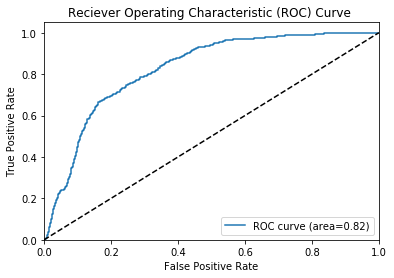

In [51]:
y_pred_log_reg = log_reg_pipeline.predict_proba(X_test)[:,1]
# Calcuate ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_log_reg)
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_log_reg)

# Plot ROC Curve

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area={auc_score:0.2f})')
plt.plot([0,1],[0,1], 'k--') # Diagonal Line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic (ROC) Curve ')
plt.legend(loc='lower right')
plt.show()

In [82]:
camp = pd.read_csv('E:\\Christ\\2021\\Dataset\\Campaign_Data.csv')

In [54]:
camp.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [55]:
list(camp)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'response']

In [56]:
camp.response.value_counts()

no     36548
yes     4640
Name: response, dtype: int64

In [57]:
4640/36548*100

12.6956331399803

In [83]:
camp['response'] = camp['response'].replace({'yes':1, 'no':0})

In [84]:
y = camp['response']
x = camp.drop('response', axis=1)
x = pd.get_dummies(x, drop_first=True)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 100)

In [61]:
X_train.shape, X_test.shape

((28831, 53), (12357, 53))

In [62]:
X_train = sm.add_constant(X_train)
model2 = sm.Logit(y_train, X_train).fit()

C:\Users\veda\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


         Current function value: 0.207444
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [63]:
test_pred1 = model2.predict(sm.add_constant(X_test))
test_df1 = pd.DataFrame()
test_df1['y_actual'] = y_test
test_df1['y_prob'] = test_pred1
test_df1['y_pred'] = np.where(test_df1['y_prob'] < 0.5,0,1)

conf_matrix = cm(test_df1['y_actual'],test_df1['y_pred'],labels=(1,0))
conf_matrix

array([[  582,   800],
       [  290, 10685]], dtype=int64)

In [64]:
TP = 582
FN = 800
FP = 290
TN = 10685

Recall = TP/(TP+FN)*100
Precision = TP/(TP+FP)*100
Accuracy = (TP+TN)/(TP+FN+FP+TN)*100

print('Recall: ',Recall)
print('Precision: ',Precision)
print('Accuracy: ',Accuracy)

Recall:  42.11287988422576
Precision:  66.74311926605505
Accuracy:  91.17908877559277


In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif

,vif_factor,features
0,2.659757e+01,age
1,2.025923e+00,duration
2,1.949184e+00,campaign
3,3.420985e+02,pdays
4,6.668286e+00,previous
5,9.383749e+01,emp.var.rate
6,6.443281e+04,cons.price.idx
7,3.905666e+02,cons.conf.idx
8,7.884015e+02,euribor3m
9,8.158232e+04,nr.employed


In [71]:
vif = vif[['features','vif_factor']]
vif.sort_values('vif_factor', ascending=False)

,features,vif_factor
33,housing_unknown,inf
35,loan_unknown,inf
9,nr.employed,8.158232e+04
6,cons.price.idx,6.443281e+04
8,euribor3m,7.884015e+02
7,cons.conf.idx,3.905666e+02
3,pdays,3.420985e+02
5,emp.var.rate,9.383749e+01
51,poutcome_nonexistent,3.755244e+01
0,age,2.659757e+01


In [95]:
y = camp['response']
x = camp.drop('response', axis=1)
x = pd.get_dummies(x, drop_first=True)

In [87]:
x = x.drop('housing_unknown', axis=1)
vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif = vif[['features','vif_factor']]
vif.sort_values('vif_factor', ascending=False)

,features,vif_factor
9,nr.employed,81582.315519
6,cons.price.idx,64432.807006
8,euribor3m,788.401541
7,cons.conf.idx,390.566570
3,pdays,342.098518
5,emp.var.rate,93.837490
50,poutcome_nonexistent,37.552441
0,age,26.597572
51,poutcome_success,11.517968
37,month_aug,8.204313


In [88]:
x = x.drop('nr.employed', axis=1)
vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif = vif[['features','vif_factor']]
vif.sort_values('vif_factor', ascending=False)

,features,vif_factor
6,cons.price.idx,1156.284721
3,pdays,341.355347
7,cons.conf.idx,229.668694
8,euribor3m,218.387664
49,poutcome_nonexistent,37.000461
5,emp.var.rate,36.450348
0,age,26.596862
50,poutcome_success,11.516063
41,month_may,7.467538
20,marital_married,6.573636


In [80]:
X_train.shape

(28831, 52)

In [79]:
y_train.shape

(28831,)

In [96]:
x = x.drop('housing_unknown', axis=1)

In [93]:
#x = x.drop('nr.employed', axis=1)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 100)
X_train = sm.add_constant(X_train)
model3 = sm.Logit(y_train, X_train).fit()

         Current function value: 0.207444
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [98]:
test_pred3 = model3.predict(sm.add_constant(X_test))
test_df3 = pd.DataFrame()
test_df3['y_actual'] = y_test
test_df3['y_prob'] = test_pred3
test_df3['y_pred'] = np.where(test_df3['y_prob'] < 0.5,0,1)

conf_matrix = cm(test_df3['y_actual'],test_df3['y_pred'],labels=(1,0))
conf_matrix

array([[  582,   800],
       [  290, 10685]], dtype=int64)

In [105]:
camp = pd.read_csv('E:\\Christ\\2021\\Dataset\\Campaign_Data.csv')
camp['response'] = camp['response'].replace({'yes':1, 'no':0})
y = camp['response']
x = camp.drop('response', axis=1)

In [106]:
y.value_counts()

0    36548
1     4640
Name: response, dtype: int64

In [107]:
numeric_vars = x.select_dtypes(include = ['int64','float64']).columns.to_list()
categorical_vars = x.select_dtypes(include = ['object','category']).columns.to_list()

In [108]:
numeric_vars

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [109]:
categorical_vars

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [110]:
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numeric_vars),
                                              ('cat', OneHotEncoder(), categorical_vars)])
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 100)

In [111]:
pipeline = Pipeline(steps= [('preprocessor', preprocessor)])
log_reg_pipeline = Pipeline(steps= [('preprocessor', preprocessor), ('classifier',LogisticRegression())])
log_reg_pipeline.fit(X_train, y_train)
y_pred_log_reg = log_reg_pipeline.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Accuracy: 0.911952739338027
[[10686   289]
 [  799   583]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10975
           1       0.67      0.42      0.52      1382

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.73     12357
weighted avg       0.90      0.91      0.90     12357



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
